# **Subset selection of Data point according to their sensitivity (Active learning)**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as model_selection
from sklearn.metrics import balanced_accuracy_score
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


# data loading for exeprements
For this exeprements i have used MNIST data set of hand writen digits, that i have taken from sklear. In this data set we have 1797 data point and each having 64 pixal.

In [ ]:
digits = datasets.load_digits()
X=digits.data
Y=digits.target
print(X.shape)
Y=pd.DataFrame(data=Y,columns=["Y"])
X=pd.DataFrame(X)


(1797, 64)


# Train and test split
we have randomly divided data point in two part, test and train. 80% data using for training and 20% for testing.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **fuction to calculate sensitivity of points**


*  we have x number of classification model.
* predict output of all unselected data points with x classifiars
* for each point, calculet frequency of that class which predicted by most of the model.
* sort data point according to frequency that we have calculte in previues step
* select top d data point with least frequency and return their index.
* these are the data point where our models are most confused. So these points are most sensitive points.






In [ ]:
def imortant_index(X_train,Y_train,X_test):
  Y_train=Y_train.iloc[:, 0]
  #KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=7)
  knn.fit(X_train, Y_train)
  y_pred1 = knn.predict(X_test)

  #LogisticRegression
  classifier =LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
  classifier.fit(X_train, Y_train)
  y_pred2 = classifier.predict(X_test)

  # SVM clasifiar
  classifier = svm.SVC(kernel='linear')
  classifier.fit(X_train, Y_train)
  y_pred3 = classifier.predict(X_test)

  # RandomForestClassifier
  # RandomForestClassifier
  classifier = RandomForestClassifier(n_estimators = 10,max_depth=100, criterion = 'entropy', random_state = 42)
  classifier.fit(X_train, Y_train)
  y_pred4 =classifier.predict(X_test)



  # Assuming stacked_array is a 2D NumPy array
  stacked_array = np.vstack((y_pred1, y_pred2, y_pred3, y_pred4))

  # Initialize an empty list to store frequencies
  index_freq=[]
  # Iterate over columns
  for i in range(stacked_array.shape[1]):
      # Use Counter to count occurrences in the entire column
      column_counter = Counter(stacked_array[:, i])

      # Find the most common element and its frequency
      most_common_element, most_common_freq = column_counter.most_common(1)[0]

      # Append the frequency to the list
      index_freq.append([most_common_freq,i])
  index_freq = sorted(index_freq)
  indexes=[inner_list[1] for inner_list in index_freq]
  return indexes[:10]


This code block selects an initial subset of 50 data points from the training set (X_train and Y_train). Then, it iterates through the remaining data points in batches of 50. For each batch, it identifies important data points using the important_index function and adds them to the selected subset. This process continues until there are fewer than 50 remaining data points. The goal is to iteratively select important data points from the training set for further analysis or training.

In [ ]:
selected_x=X_train[:50]
selected_y=Y_train[:50]
rem_x=X_train[50:]
rem_y=Y_train[50:]
while(len(rem_x)>49):
  batch_x=rem_x[:50]
  batch_y=rem_y[:50]
  rem_x=rem_x[50:]
  rem_y=rem_y[50:]
  sected_index=imortant_index(selected_x,selected_y,batch_x)
  selected_x= pd.concat([selected_x,batch_x.iloc[sected_index]], ignore_index=True)
  selected_y= pd.concat([selected_y,batch_y.iloc[sected_index]], ignore_index=True)
  # print(sected_index)

In [ ]:
selected_x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,3.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,3.0,11.0,16.0,13.0,4.0,0.0
1,0.0,0.0,9.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,14.0,3.0,0.0,0.0
2,0.0,0.0,0.0,10.0,13.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,11.0,13.0,6.0,0.0,0.0
3,0.0,1.0,10.0,16.0,16.0,11.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,1.0,15.0,14.0,11.0,4.0,0.0,0.0
4,0.0,0.0,6.0,14.0,13.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,4.0,15.0,16.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.0,0.0,2.0,15.0,13.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,16.0,15.0,5.0,0.0,0.0
316,0.0,2.0,16.0,16.0,16.0,16.0,4.0,0.0,0.0,4.0,...,8.0,0.0,0.0,3.0,13.0,16.0,16.0,15.0,1.0,0.0
317,0.0,0.0,9.0,13.0,16.0,5.0,0.0,0.0,0.0,3.0,...,8.0,0.0,0.0,0.0,8.0,12.0,13.0,15.0,2.0,0.0
318,0.0,0.0,0.0,5.0,15.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,15.0,2.0,0.0,0.0


In [ ]:
selected_y

,Y
0,6
1,0
2,0
3,3
4,0
...,...
315,0
316,5
317,0
318,4


accuracy of KNN on full data:  0.9888888888888889
accuracy of KNN on subset data:  0.975


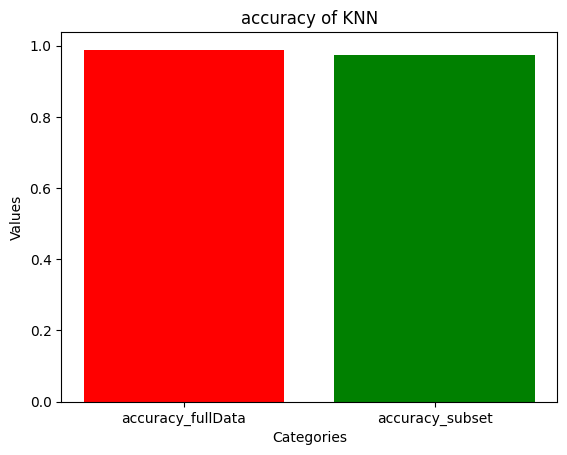

accuracy of LogisticRegression on full data:  0.9722222222222222
accuracy of LogisticRegression on subset  data:  0.9555555555555556


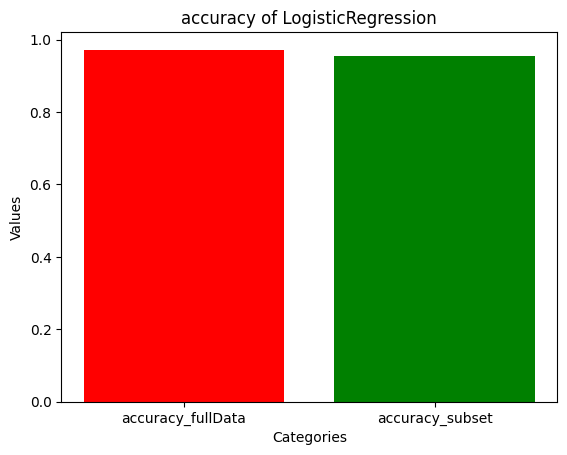

accuracy of SVM on full data:  0.9777777777777777
accuracy of SVM on subset  data:  0.9777777777777777


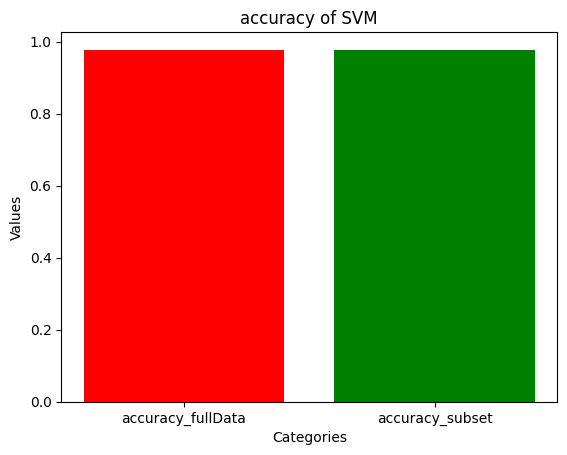

accuracy of RandomForest on full data:  0.9527777777777777
accuracy of RandomForest on subset  data:  0.9111111111111111


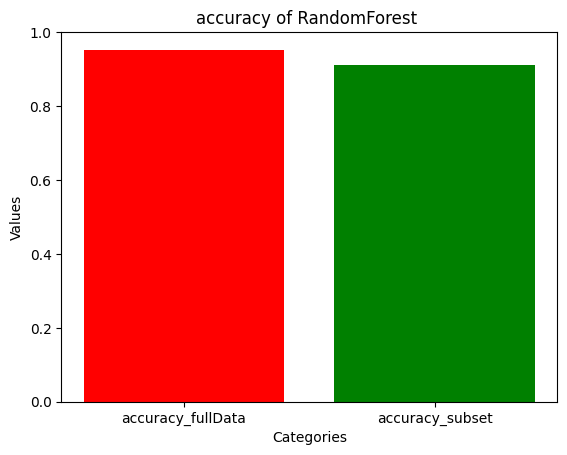

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#Y_train=Y_train.iloc[:, 0]
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy_org = accuracy_score(Y_test, y_pred)
print('accuracy of KNN on full data: ',accuracy_org)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(selected_x, selected_y)
y_pred = knn.predict(X_test)
accuracy_subset = accuracy_score(Y_test, y_pred)
print('accuracy of KNN on subset data: ',accuracy_subset)

categories = ['accuracy_fullData', 'accuracy_subset' ]
values = [accuracy_org, accuracy_subset]
colors = ['red', 'green']

# Creating a bar chart
plt.bar(categories, values, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('accuracy of KNN')

# Display the bar chart
plt.show()

 #LogisticRegression
classifier =LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
accuracy_org = accuracy_score(Y_test, y_pred)
print('accuracy of LogisticRegression on full data: ',accuracy_org)

classifier =LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
classifier.fit(selected_x, selected_y)
y_pred = classifier.predict(X_test)
accuracy_subset = accuracy_score(Y_test, y_pred)
print('accuracy of LogisticRegression on subset  data: ',accuracy_subset)

categories = ['accuracy_fullData', 'accuracy_subset' ]
values = [accuracy_org, accuracy_subset]
colors = ['red', 'green']

# Creating a bar chart
plt.bar(categories, values, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('accuracy of LogisticRegression')

# Display the bar chart
plt.show()

# SVM clasifiar
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
accuracy_org = accuracy_score(Y_test, y_pred)
print('accuracy of SVM on full data: ',accuracy_org)

classifier = svm.SVC(kernel='linear')
classifier.fit(selected_x, selected_y)
y_pred = classifier.predict(X_test)
accuracy_subset = accuracy_score(Y_test, y_pred)
print('accuracy of SVM on subset  data: ',accuracy_subset)

categories = ['accuracy_fullData', 'accuracy_subset' ]
values = [accuracy_org, accuracy_subset]
colors = ['red', 'green']

# Creating a bar chart
plt.bar(categories, values, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('accuracy of SVM')

# Display the bar chart
plt.show()

# RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
accuracy_org = accuracy_score(Y_test, y_pred)
print('accuracy of RandomForest on full data: ',accuracy_org)

classifier.fit(X_train, Y_train)
classifier.fit(selected_x, selected_y)
y_pred = classifier.predict(X_test)
accuracy_subset = accuracy_score(Y_test, y_pred)
print('accuracy of RandomForest on subset  data: ',accuracy_subset)

categories = ['accuracy_fullData', 'accuracy_subset' ]
values = [accuracy_org, accuracy_subset]
colors = ['red', 'green']

# Creating a bar chart
plt.bar(categories, values, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('accuracy of RandomForest ')

# Display the bar chart
plt.show()

# **Results**

**KNeighborsClassifier**

accuracy of KNN on full data:  0.9888888888888889

accuracy of KNN on subset data:  0.975


**LogisticRegression**

accuracy of LogisticRegression on full data:  0.9722222222222222

accuracy of LogisticRegression on subset  data:  0.9555555555555556

**SVM clasifiar**

accuracy of SVM on full data:  0.9777777777777777

accuracy of SVM on subset  data:  0.9777777777777777

**RandomForestClassifier**

accuracy of RandomForest on full data:  0.9527777777777777

accuracy of RandomForest on subset  data:  0.9111111111111111

# Use of Submodularity
The function iteratively adds each data point from new_x and new_y to the existing selected subset. For each iteration, it trains a KNN classifier on the augmented subset and evaluates its accuracy on the test set. After processing all data points in batches of 50, it returns the indices of the top 10 iterations with the highest accuracy scores.

This approach allows for incremental selection of data points, considering their impact on model accuracy. The function helps identify the most influential data points for improving the model's performance.

In [ ]:
def selection1(selected_x, selected_y, new_x, new_y, X_test, Y_test):
    accuracy_list = []
    for i in range(len(new_x)):
        selected_x=selected_x.append(new_x.iloc[i])
        selected_y=selected_y.append(new_y.iloc[i])
        knn = KNeighborsClassifier(n_neighbors=7)
        knn.fit(selected_x, selected_y)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)
        accuracy_list.append(accuracy)
        # Remove the last element from selected_x and selected_y
        selected_x = selected_x.iloc[:-1]
        selected_y = selected_y.iloc[:-1]

    # Get the indices of the top 10 iterations based on accuracy
    descending_indices = np.argsort(accuracy_list)[::-1]
    return descending_indices[:10].tolist()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


This function iterates over each batch of 50 data points until there are fewer than 50 remaining data points. For each iteration, it calls the selection1 function to select the top 10 data points from the current batch based on their impact on model accuracy. These selected data points are then appended to the existing selected subset (selected_x and selected_y

In [ ]:
selected_x=X_train[:50]
selected_y=Y_train[:50]
rem_x=X_train[50:]
rem_y=Y_train[50:]
while(len(rem_x)>49):
  batch_x=rem_x[:50]
  batch_y=rem_y[:50]
  rem_x=rem_x[50:]
  rem_y=rem_y[50:]
  sected_index=selection1(selected_x, selected_y, batch_x, batch_y, X_test, Y_test)
  selected_x= pd.concat([selected_x,batch_x.iloc[sected_index]], ignore_index=True)
  selected_y= pd.concat([selected_y,batch_y.iloc[sected_index]], ignore_index=True)

Here we will compare accuracy.

accuracy of KNN on full data:  0.9888888888888889
accuracy of KNN on subset data:  0.9861111111111112


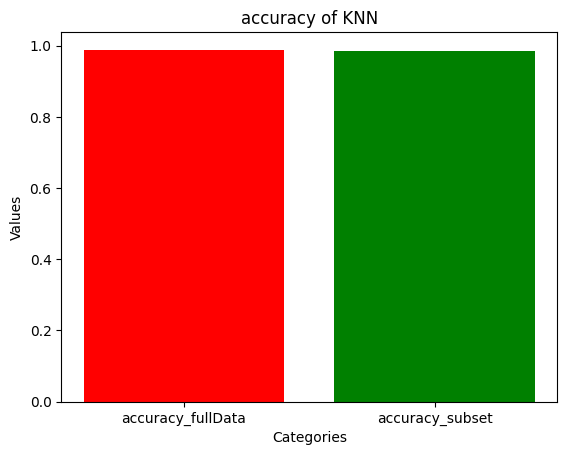

accuracy of LogisticRegression on full data:  0.9722222222222222
accuracy of LogisticRegression on subset  data:  0.95


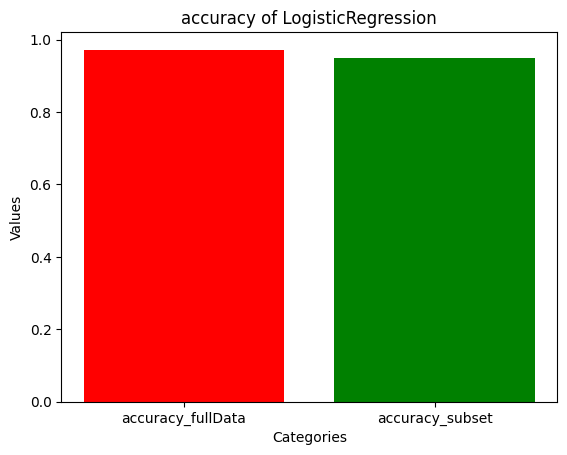

accuracy of SVM on full data:  0.9777777777777777
accuracy of SVM on subset  data:  0.9722222222222222


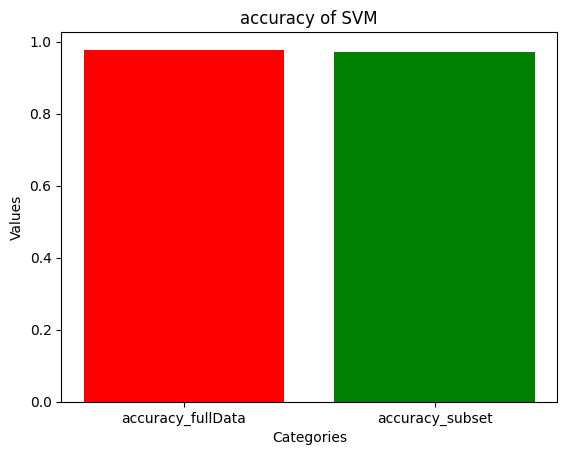

accuracy of RandomForest on full data:  0.9527777777777777
accuracy of RandomForest on subset  data:  0.8972222222222223


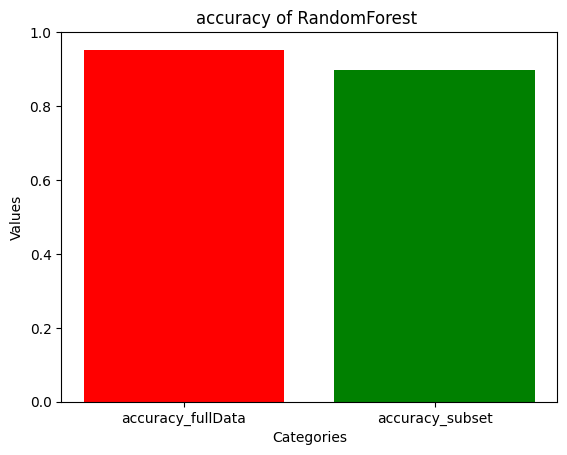

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#Y_train=Y_train.iloc[:, 0]
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy_org = accuracy_score(Y_test, y_pred)
print('accuracy of KNN on full data: ',accuracy_org)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(selected_x, selected_y)
y_pred = knn.predict(X_test)
accuracy_subset = accuracy_score(Y_test, y_pred)
print('accuracy of KNN on subset data: ',accuracy_subset)

categories = ['accuracy_fullData', 'accuracy_subset' ]
values = [accuracy_org, accuracy_subset]
colors = ['red', 'green']

# Creating a bar chart
plt.bar(categories, values, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('accuracy of KNN')

# Display the bar chart
plt.show()

 #LogisticRegression
classifier =LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
accuracy_org = accuracy_score(Y_test, y_pred)
print('accuracy of LogisticRegression on full data: ',accuracy_org)

classifier =LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
classifier.fit(selected_x, selected_y)
y_pred = classifier.predict(X_test)
accuracy_subset = accuracy_score(Y_test, y_pred)
print('accuracy of LogisticRegression on subset  data: ',accuracy_subset)

categories = ['accuracy_fullData', 'accuracy_subset' ]
values = [accuracy_org, accuracy_subset]
colors = ['red', 'green']

# Creating a bar chart
plt.bar(categories, values, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('accuracy of LogisticRegression')

# Display the bar chart
plt.show()

# SVM clasifiar
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
accuracy_org = accuracy_score(Y_test, y_pred)
print('accuracy of SVM on full data: ',accuracy_org)

classifier = svm.SVC(kernel='linear')
classifier.fit(selected_x, selected_y)
y_pred = classifier.predict(X_test)
accuracy_subset = accuracy_score(Y_test, y_pred)
print('accuracy of SVM on subset  data: ',accuracy_subset)

categories = ['accuracy_fullData', 'accuracy_subset' ]
values = [accuracy_org, accuracy_subset]
colors = ['red', 'green']

# Creating a bar chart
plt.bar(categories, values, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('accuracy of SVM')

# Display the bar chart
plt.show()

# RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
accuracy_org = accuracy_score(Y_test, y_pred)
print('accuracy of RandomForest on full data: ',accuracy_org)

classifier.fit(X_train, Y_train)
classifier.fit(selected_x, selected_y)
y_pred = classifier.predict(X_test)
accuracy_subset = accuracy_score(Y_test, y_pred)
print('accuracy of RandomForest on subset  data: ',accuracy_subset)

categories = ['accuracy_fullData', 'accuracy_subset' ]
values = [accuracy_org, accuracy_subset]
colors = ['red', 'green']

# Creating a bar chart
plt.bar(categories, values, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('accuracy of RandomForest ')

# Display the bar chart
plt.show()